In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

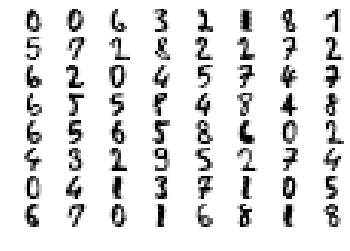

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.49340 stdev: 0.16493
Best fitness: 0.94462 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.477
Mean genetic distance 2.925, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 1.942 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58488 stdev: 0.16356
Best fitness: 0.98154 - size: (3, 13) - species 10 - id 237
Average adjusted fitness: 0.476
Mean genetic distance 2.957, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 1.801 sec (1.872 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64793 stdev: 0.18911
Best fitness: 0.99077 - size: (2, 13) - species 4 - id 517
Average adjusted fitness: 0.431
Mean genetic distance 2.970, standard deviation 0.537
Population of 197 members in 30 species
Total extinctio

Population's average fitness: 0.78560 stdev: 0.20290
Best fitness: 0.99692 - size: (5, 19) - species 30 - id 3477
Average adjusted fitness: 0.598
Mean genetic distance 3.241, standard deviation 0.528
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 2.704 sec (2.794 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77443 stdev: 0.19976
Best fitness: 0.99692 - size: (5, 19) - species 30 - id 3477
Average adjusted fitness: 0.525
Mean genetic distance 3.293, standard deviation 0.539
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 2.386 sec (2.765 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78077 stdev: 0.20103
Best fitness: 0.99692 - size: (5, 19) - species 30 - id 3477
Average adjusted fitness: 0.656
Mean genetic distance 3.254, standard deviation 0.553
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 2.452 sec (2.748 average)

 ******

Population's average fitness: 0.61386 stdev: 0.17696
Best fitness: 1.00000 - size: (2, 14) - species 15 - id 365

Best individual in generation 1 meets fitness threshold - complexity: (2, 14)
Class1:0 #class1:162
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.50537 stdev: 0.15603
Best fitness: 0.94737 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.445
Mean genetic distance 2.888, standard deviation 0.443
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 2.150 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57429 stdev: 0.17553
Best fitness: 0.96285 - size: (2, 14) - species 1 - id 328
Average adjusted fitness: 0.466
Mean genetic distance 2.986, standard deviation 0.459
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 2.255 sec (2.203 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60946 stdev: 0.18122
Best fitne

Population's average fitness: 0.50425 stdev: 0.13421
Best fitness: 0.96933 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.459
Mean genetic distance 2.903, standard deviation 0.487
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 1.721 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55807 stdev: 0.18113
Best fitness: 0.96933 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.497
Mean genetic distance 3.027, standard deviation 0.507
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 1.793 sec (1.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62577 stdev: 0.17622
Best fitness: 0.96933 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.472
Mean genetic distance 3.080, standard deviation 0.502
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 2.212 sec (1.909 average)

 ****** Running generation 3 **

Mean genetic distance 2.991, standard deviation 0.479
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 1.953 sec (1.843 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64730 stdev: 0.17796
Best fitness: 0.99077 - size: (4, 16) - species 18 - id 461
Average adjusted fitness: 0.389
Mean genetic distance 3.020, standard deviation 0.477
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 1.992 sec (1.893 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66136 stdev: 0.19589
Best fitness: 0.99077 - size: (4, 16) - species 18 - id 461
Average adjusted fitness: 0.536
Mean genetic distance 3.041, standard deviation 0.489
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 2.173 sec (1.963 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68724 stdev: 0.19611
Best fitness: 0.99077 - size: (4, 16) - species 4 - id 461
Average

Mean genetic distance 3.227, standard deviation 0.514
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 3.634 sec (2.852 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.79331 stdev: 0.20681
Best fitness: 0.99692 - size: (6, 17) - species 38 - id 2186
Average adjusted fitness: 0.644
Mean genetic distance 3.228, standard deviation 0.518
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 2.584 sec (2.855 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.79529 stdev: 0.19819
Best fitness: 0.99692 - size: (6, 17) - species 38 - id 2186
Average adjusted fitness: 0.354
Mean genetic distance 3.226, standard deviation 0.527
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 2.707 sec (2.880 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.78907 stdev: 0.20441
Best fitness: 0.99692 - size: (6, 17) - species 38 - id 2186


Population's average fitness: 0.65644 stdev: 0.18619
Best fitness: 0.99689 - size: (2, 14) - species 23 - id 346
Average adjusted fitness: 0.444
Mean genetic distance 3.055, standard deviation 0.479
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.983 sec (3.592 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67223 stdev: 0.20169
Best fitness: 1.00000 - size: (4, 17) - species 1 - id 794

Best individual in generation 4 meets fitness threshold - complexity: (4, 17)
Class1:0 #class1:162
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.51055 stdev: 0.14692
Best fitness: 0.97806 - size: (2, 13) - species 7 - id 130
Average adjusted fitness: 0.450
Mean genetic distance 2.864, standard deviation 0.453
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 3.938 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57766 stdev: 0.17181
Best fit

Mean genetic distance 3.180, standard deviation 0.495
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 18.047 sec (6.976 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74195 stdev: 0.21555
Best fitness: 0.99373 - size: (8, 23) - species 11 - id 3013
Average adjusted fitness: 0.545
Mean genetic distance 3.176, standard deviation 0.500
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.280 sec (6.930 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77196 stdev: 0.21822
Best fitness: 0.99373 - size: (8, 23) - species 11 - id 3013
Average adjusted fitness: 0.720
Mean genetic distance 3.156, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.680 sec (7.020 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78997 stdev: 0.19854
Best fitness: 0.99373 - size: (8, 23) - species 11 - id 3013

Population's average fitness: 0.72277 stdev: 0.18114
Best fitness: 0.99691 - size: (8, 22) - species 48 - id 1718
Average adjusted fitness: 0.341
Mean genetic distance 3.144, standard deviation 0.513
Population of 192 members in 50 species
Total extinctions: 0
Generation time: 4.103 sec (4.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72713 stdev: 0.18040
Best fitness: 0.99691 - size: (8, 22) - species 48 - id 1718
Average adjusted fitness: 0.688
Mean genetic distance 3.175, standard deviation 0.514
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 4.032 sec (4.149 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72795 stdev: 0.18338
Best fitness: 0.99691 - size: (8, 22) - species 48 - id 1718
Average adjusted fitness: 0.427
Mean genetic distance 3.181, standard deviation 0.499
Population of 190 members in 50 species
Total extinctions: 0
Generation time: 4.506 sec (4.196 average)

 ******

Mean genetic distance 3.151, standard deviation 0.506
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 4.251 sec (4.218 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70461 stdev: 0.15525
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061
Average adjusted fitness: 0.373
Mean genetic distance 3.134, standard deviation 0.505
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.202 sec (4.206 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.71446 stdev: 0.15494
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061
Average adjusted fitness: 0.434
Mean genetic distance 3.143, standard deviation 0.510
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 4.045 sec (4.188 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70461 stdev: 0.15388
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061


Mean genetic distance 3.215, standard deviation 0.555
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.633 sec (4.677 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.70951 stdev: 0.15467
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061
Average adjusted fitness: 0.453
Mean genetic distance 3.201, standard deviation 0.559
Population of 208 members in 21 species
Total extinctions: 0
Generation time: 4.807 sec (4.719 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.72604 stdev: 0.15537
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061
Average adjusted fitness: 0.484
Mean genetic distance 3.243, standard deviation 0.552
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 5.229 sec (4.794 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.71332 stdev: 0.15476
Best fitness: 0.95975 - size: (4, 16) - species 16 - id 1061


Mean genetic distance 2.880, standard deviation 0.497
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 2.896 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58066 stdev: 0.13849
Best fitness: 0.93293 - size: (2, 13) - species 5 - id 68
Average adjusted fitness: 0.372
Mean genetic distance 2.924, standard deviation 0.480
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 3.482 sec (3.189 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60804 stdev: 0.14744
Best fitness: 0.93293 - size: (2, 13) - species 5 - id 68
Average adjusted fitness: 0.371
Mean genetic distance 2.929, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 3.318 sec (3.232 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62565 stdev: 0.14851
Best fitness: 0.93293 - size: (2, 13) - species 5 - id 68
Average adjusted fitness: 0.

Mean genetic distance 3.234, standard deviation 0.509
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 4.432 sec (4.327 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75264 stdev: 0.17182
Best fitness: 0.98171 - size: (9, 27) - species 13 - id 3470
Average adjusted fitness: 0.350
Mean genetic distance 3.242, standard deviation 0.505
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.437 sec (4.332 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77421 stdev: 0.17192
Best fitness: 0.98171 - size: (9, 27) - species 13 - id 3470
Average adjusted fitness: 0.620
Mean genetic distance 3.264, standard deviation 0.507
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.595 sec (4.376 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77408 stdev: 0.17571
Best fitness: 0.98476 - size: (9, 27) - species 13 - id 4042


Mean genetic distance 3.249, standard deviation 0.577
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 5.110 sec (5.056 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.75046 stdev: 0.17764
Best fitness: 0.99695 - size: (10, 29) - species 30 - id 5707
Average adjusted fitness: 0.458
Mean genetic distance 3.271, standard deviation 0.582
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 4.830 sec (5.040 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.73575 stdev: 0.18750
Best fitness: 0.99695 - size: (10, 29) - species 30 - id 5707
Average adjusted fitness: 0.486
Mean genetic distance 3.275, standard deviation 0.601
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.813 sec (5.019 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76933 stdev: 0.17626
Best fitness: 0.99695 - size: (10, 29) - species 30 - id 57

Mean genetic distance 3.069, standard deviation 0.475
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.562 sec (3.250 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64668 stdev: 0.14315
Best fitness: 0.93519 - size: (3, 14) - species 30 - id 686
Average adjusted fitness: 0.333
Mean genetic distance 3.057, standard deviation 0.452
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.569 sec (3.296 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67794 stdev: 0.15278
Best fitness: 0.94136 - size: (5, 20) - species 3 - id 1150
Average adjusted fitness: 0.368
Mean genetic distance 3.067, standard deviation 0.480
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 3.723 sec (3.349 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68866 stdev: 0.14872
Best fitness: 0.94136 - size: (5, 20) - species 3 - id 1150
Averag

Mean genetic distance 3.179, standard deviation 0.524
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.627 sec (4.251 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70347 stdev: 0.16301
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014
Average adjusted fitness: 0.253
Mean genetic distance 3.158, standard deviation 0.523
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.514 sec (4.309 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.72739 stdev: 0.16113
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014
Average adjusted fitness: 0.362
Mean genetic distance 3.181, standard deviation 0.541
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.662 sec (4.388 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.72225 stdev: 0.17557
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014


Mean genetic distance 3.225, standard deviation 0.590
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.651 sec (4.817 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.71651 stdev: 0.17184
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014
Average adjusted fitness: 0.462
Mean genetic distance 3.190, standard deviation 0.582
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 4.738 sec (4.812 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.71577 stdev: 0.17341
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014
Average adjusted fitness: 0.527
Mean genetic distance 3.212, standard deviation 0.611
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.818 sec (4.777 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.71728 stdev: 0.16684
Best fitness: 0.95988 - size: (9, 28) - species 12 - id 4014


Mean genetic distance 3.116, standard deviation 0.456
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 3.853 sec (3.561 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69063 stdev: 0.15873
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Average adjusted fitness: 0.588
Mean genetic distance 3.155, standard deviation 0.452
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 3.950 sec (3.647 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70972 stdev: 0.15831
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Average adjusted fitness: 0.611
Mean genetic distance 3.166, standard deviation 0.460
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 3.924 sec (3.709 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70979 stdev: 0.16143
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Averag

Mean genetic distance 3.245, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.475 sec (4.114 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.74519 stdev: 0.16528
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Average adjusted fitness: 0.432
Mean genetic distance 3.236, standard deviation 0.567
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.072 sec (4.121 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.72188 stdev: 0.17248
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Average adjusted fitness: 0.397
Mean genetic distance 3.241, standard deviation 0.550
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.585 sec (4.170 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73321 stdev: 0.17019
Best fitness: 0.98471 - size: (3, 15) - species 3 - id 815
Averag

Mean genetic distance 3.263, standard deviation 0.592
Population of 207 members in 21 species
Total extinctions: 0
Generation time: 4.779 sec (4.701 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.74819 stdev: 0.17763
Best fitness: 0.99083 - size: (4, 18) - species 3 - id 7440
Average adjusted fitness: 0.432
Mean genetic distance 3.249, standard deviation 0.592
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.026 sec (4.758 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75298 stdev: 0.17430
Best fitness: 0.99083 - size: (4, 18) - species 3 - id 7440
Average adjusted fitness: 0.537
Mean genetic distance 3.264, standard deviation 0.581
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.933 sec (4.800 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75884 stdev: 0.18406
Best fitness: 0.99083 - size: (4, 18) - species 3 - id 7440
Ave

Mean genetic distance 3.244, standard deviation 0.529
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 3.813 sec (3.766 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72257 stdev: 0.15393
Best fitness: 0.97239 - size: (5, 20) - species 33 - id 2139
Average adjusted fitness: 0.424
Mean genetic distance 3.229, standard deviation 0.536
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 3.802 sec (3.764 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71748 stdev: 0.15921
Best fitness: 0.97239 - size: (5, 20) - species 33 - id 2139
Average adjusted fitness: 0.421
Mean genetic distance 3.237, standard deviation 0.535
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 3.867 sec (3.775 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72167 stdev: 0.16788
Best fitness: 0.98160 - size: (6, 22) - species 33 - id 2523


Mean genetic distance 3.249, standard deviation 0.554
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 4.145 sec (4.267 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74454 stdev: 0.17200
Best fitness: 0.98160 - size: (6, 22) - species 33 - id 2523
Average adjusted fitness: 0.457
Mean genetic distance 3.260, standard deviation 0.537
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 4.949 sec (4.321 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.72720 stdev: 0.16887
Best fitness: 0.98160 - size: (6, 22) - species 33 - id 2523
Average adjusted fitness: 0.456
Mean genetic distance 3.248, standard deviation 0.549
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 4.978 sec (4.394 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.73433 stdev: 0.16888
Best fitness: 0.98160 - size: (6, 22) - species 33 - id 2523


Mean genetic distance 3.282, standard deviation 0.601
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 4.710 sec (4.496 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.72915 stdev: 0.18687
Best fitness: 0.99080 - size: (7, 25) - species 13 - id 8694
Average adjusted fitness: 0.578
Mean genetic distance 3.278, standard deviation 0.603
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.705 sec (4.526 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.72410 stdev: 0.18211
Best fitness: 0.99080 - size: (16, 34) - species 54 - id 9491
Average adjusted fitness: 0.514
Mean genetic distance 3.277, standard deviation 0.604
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 4.663 sec (4.539 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.74210 stdev: 0.17897
Best fitness: 0.99080 - size: (16, 34) - species 54 - id 949

Mean genetic distance 3.112, standard deviation 0.514
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 4.119 sec (4.043 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73305 stdev: 0.17696
Best fitness: 0.97214 - size: (4, 16) - species 11 - id 1234
Average adjusted fitness: 0.544
Mean genetic distance 3.102, standard deviation 0.513
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 3.953 sec (4.047 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73984 stdev: 0.17221
Best fitness: 0.97214 - size: (4, 16) - species 11 - id 1234
Average adjusted fitness: 0.566
Mean genetic distance 3.090, standard deviation 0.521
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 3.997 sec (4.042 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74669 stdev: 0.17484
Best fitness: 0.98142 - size: (4, 15) - species 11 - id 3493


Mean genetic distance 3.192, standard deviation 0.599
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 5.307 sec (4.558 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.73677 stdev: 0.17098
Best fitness: 0.98452 - size: (7, 24) - species 34 - id 5917
Average adjusted fitness: 0.405
Mean genetic distance 3.160, standard deviation 0.599
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 4.415 sec (4.556 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.74232 stdev: 0.17654
Best fitness: 0.98452 - size: (7, 24) - species 34 - id 5917
Average adjusted fitness: 0.531
Mean genetic distance 3.203, standard deviation 0.580
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.363 sec (4.547 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.72146 stdev: 0.19039
Best fitness: 0.98452 - size: (7, 24) - species 34 - id 5917


Population's average fitness: 0.60525 stdev: 0.11061
Best fitness: 0.85625 - size: (4, 16) - species 19 - id 947
Average adjusted fitness: 0.281
Mean genetic distance 2.971, standard deviation 0.474
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 3.479 sec (3.244 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61099 stdev: 0.11042
Best fitness: 0.85625 - size: (4, 16) - species 19 - id 947
Average adjusted fitness: 0.249
Mean genetic distance 2.998, standard deviation 0.475
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 3.546 sec (3.287 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62828 stdev: 0.11578
Best fitness: 0.85625 - size: (4, 16) - species 19 - id 947
Average adjusted fitness: 0.307
Mean genetic distance 3.026, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.629 sec (3.330 average)

 ****** Runn

Population's average fitness: 0.68334 stdev: 0.13997
Best fitness: 0.89375 - size: (12, 28) - species 11 - id 3558
Average adjusted fitness: 0.397
Mean genetic distance 3.288, standard deviation 0.566
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.455 sec (4.275 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.69248 stdev: 0.13482
Best fitness: 0.89375 - size: (12, 28) - species 11 - id 3558
Average adjusted fitness: 0.341
Mean genetic distance 3.276, standard deviation 0.555
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.377 sec (4.293 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68868 stdev: 0.13566
Best fitness: 0.89375 - size: (12, 28) - species 11 - id 3558
Average adjusted fitness: 0.344
Mean genetic distance 3.272, standard deviation 0.550
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 4.486 sec (4.336 average)

 ***

Population's average fitness: 0.69314 stdev: 0.14214
Best fitness: 0.90312 - size: (13, 33) - species 46 - id 6800
Average adjusted fitness: 0.316
Mean genetic distance 3.224, standard deviation 0.547
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.063 sec (5.256 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.70359 stdev: 0.14326
Best fitness: 0.90312 - size: (7, 25) - species 42 - id 7885
Average adjusted fitness: 0.341
Mean genetic distance 3.257, standard deviation 0.551
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 5.224 sec (5.293 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.68636 stdev: 0.14059
Best fitness: 0.90312 - size: (7, 25) - species 42 - id 7885
Average adjusted fitness: 0.293
Mean genetic distance 3.253, standard deviation 0.558
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 5.287 sec (5.310 average)

 *****

Population's average fitness: 0.67773 stdev: 0.14451
Best fitness: 0.93231 - size: (3, 15) - species 2 - id 380
Average adjusted fitness: 0.501
Mean genetic distance 3.156, standard deviation 0.470
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 3.582 sec (3.545 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68969 stdev: 0.14828
Best fitness: 0.93231 - size: (3, 15) - species 2 - id 380
Average adjusted fitness: 0.521
Mean genetic distance 3.172, standard deviation 0.467
Population of 192 members in 45 species
Total extinctions: 0
Generation time: 3.589 sec (3.583 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70333 stdev: 0.14798
Best fitness: 0.93231 - size: (3, 14) - species 45 - id 1035
Average adjusted fitness: 0.532
Mean genetic distance 3.151, standard deviation 0.470
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 3.734 sec (3.617 average)

 ****** Run

Population's average fitness: 0.73606 stdev: 0.14932
Best fitness: 0.96000 - size: (4, 19) - species 27 - id 3548
Average adjusted fitness: 0.356
Mean genetic distance 3.225, standard deviation 0.501
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 4.360 sec (4.150 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.73240 stdev: 0.15232
Best fitness: 0.96000 - size: (4, 19) - species 27 - id 3548
Average adjusted fitness: 0.335
Mean genetic distance 3.188, standard deviation 0.522
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 4.167 sec (4.170 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.73946 stdev: 0.15066
Best fitness: 0.96000 - size: (4, 19) - species 27 - id 3548
Average adjusted fitness: 0.414
Mean genetic distance 3.193, standard deviation 0.513
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 4.029 sec (4.180 average)

 ******

Population's average fitness: 0.72376 stdev: 0.15780
Best fitness: 0.96308 - size: (6, 24) - species 27 - id 6760
Average adjusted fitness: 0.394
Mean genetic distance 3.189, standard deviation 0.558
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.347 sec (4.559 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.72381 stdev: 0.15529
Best fitness: 0.96308 - size: (6, 24) - species 27 - id 6760
Average adjusted fitness: 0.437
Mean genetic distance 3.195, standard deviation 0.579
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.272 sec (4.536 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.71404 stdev: 0.15234
Best fitness: 0.96308 - size: (6, 24) - species 27 - id 6760
Average adjusted fitness: 0.394
Mean genetic distance 3.175, standard deviation 0.569
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.202 sec (4.492 average)

 ******

Population's average fitness: 0.70818 stdev: 0.16776
Best fitness: 0.95385 - size: (5, 18) - species 16 - id 977
Average adjusted fitness: 0.324
Mean genetic distance 3.197, standard deviation 0.500
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 3.868 sec (3.840 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71692 stdev: 0.16606
Best fitness: 0.95385 - size: (5, 18) - species 16 - id 977
Average adjusted fitness: 0.514
Mean genetic distance 3.229, standard deviation 0.501
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 3.973 sec (3.873 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71917 stdev: 0.17735
Best fitness: 0.95692 - size: (7, 21) - species 2 - id 2678
Average adjusted fitness: 0.516
Mean genetic distance 3.226, standard deviation 0.497
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.908 sec (3.901 average)

 ****** Ru

Population's average fitness: 0.72874 stdev: 0.18010
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.510
Mean genetic distance 3.165, standard deviation 0.582
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.517 sec (4.434 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74162 stdev: 0.17545
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.323
Mean genetic distance 3.170, standard deviation 0.588
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.544 sec (4.463 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71804 stdev: 0.18423
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.537
Mean genetic distance 3.197, standard deviation 0.595
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 4.693 sec (4.503 average)

 ******

Population's average fitness: 0.73589 stdev: 0.19533
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.590
Mean genetic distance 3.153, standard deviation 0.598
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 5.385 sec (5.295 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.73775 stdev: 0.19238
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.621
Mean genetic distance 3.164, standard deviation 0.603
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.371 sec (5.247 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73229 stdev: 0.20106
Best fitness: 0.98154 - size: (9, 27) - species 16 - id 5354
Average adjusted fitness: 0.684
Mean genetic distance 3.114, standard deviation 0.596
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 5.606 sec (5.266 average)

 ******

Population's average fitness: 0.78603 stdev: 0.18144
Best fitness: 0.99688 - size: (7, 21) - species 34 - id 2527
Average adjusted fitness: 0.392
Mean genetic distance 3.130, standard deviation 0.518
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 3.724 sec (3.762 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.81325 stdev: 0.17421
Best fitness: 0.99688 - size: (7, 21) - species 34 - id 2527
Average adjusted fitness: 0.490
Mean genetic distance 3.130, standard deviation 0.525
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 3.649 sec (3.753 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.81120 stdev: 0.17946
Best fitness: 0.99688 - size: (7, 21) - species 34 - id 2527
Average adjusted fitness: 0.540
Mean genetic distance 3.118, standard deviation 0.523
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 3.824 sec (3.760 average)

 ******

Mean genetic distance 3.053, standard deviation 0.499
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 3.619 sec (3.361 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71627 stdev: 0.17803
Best fitness: 0.97840 - size: (5, 19) - species 24 - id 1426
Average adjusted fitness: 0.571
Mean genetic distance 3.063, standard deviation 0.498
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.761 sec (3.406 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73230 stdev: 0.16534
Best fitness: 0.97840 - size: (5, 19) - species 24 - id 1426
Average adjusted fitness: 0.587
Mean genetic distance 3.073, standard deviation 0.494
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.730 sec (3.438 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74161 stdev: 0.16252
Best fitness: 0.97840 - size: (5, 19) - species 24 - id 1426
Av

Mean genetic distance 3.227, standard deviation 0.524
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 3.999 sec (4.077 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.77482 stdev: 0.17045
Best fitness: 0.98765 - size: (5, 18) - species 24 - id 3992
Average adjusted fitness: 0.447
Mean genetic distance 3.192, standard deviation 0.518
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 4.014 sec (4.096 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.77380 stdev: 0.17935
Best fitness: 0.99074 - size: (6, 19) - species 24 - id 4706
Average adjusted fitness: 0.681
Mean genetic distance 3.209, standard deviation 0.534
Population of 191 members in 23 species
Total extinctions: 0
Generation time: 4.067 sec (4.112 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75326 stdev: 0.19008
Best fitness: 0.99074 - size: (6, 19) - species 24 - id 4706


Mean genetic distance 3.221, standard deviation 0.567
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 4.492 sec (4.358 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.75797 stdev: 0.18191
Best fitness: 0.99383 - size: (6, 19) - species 24 - id 6245
Average adjusted fitness: 0.472
Mean genetic distance 3.225, standard deviation 0.565
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 4.526 sec (4.373 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75985 stdev: 0.16893
Best fitness: 0.99383 - size: (6, 19) - species 24 - id 6245
Average adjusted fitness: 0.374
Mean genetic distance 3.206, standard deviation 0.545
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.451 sec (4.389 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77148 stdev: 0.17088
Best fitness: 0.99383 - size: (6, 19) - species 24 - id 6245


Mean genetic distance 3.208, standard deviation 0.519
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 3.592 sec (3.519 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73067 stdev: 0.19245
Best fitness: 0.98762 - size: (4, 20) - species 11 - id 1776
Average adjusted fitness: 0.606
Mean genetic distance 3.234, standard deviation 0.532
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 3.511 sec (3.532 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73116 stdev: 0.20029
Best fitness: 0.98762 - size: (4, 20) - species 11 - id 1776
Average adjusted fitness: 0.573
Mean genetic distance 3.221, standard deviation 0.514
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.619 sec (3.547 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74461 stdev: 0.19059
Best fitness: 0.98762 - size: (4, 20) - species 11 - id 1776


Population's average fitness: 0.69817 stdev: 0.17664
Best fitness: 0.99375 - size: (6, 21) - species 29 - id 1344
Average adjusted fitness: 0.548
Mean genetic distance 3.139, standard deviation 0.471
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 3.700 sec (3.497 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69877 stdev: 0.17386
Best fitness: 0.99375 - size: (6, 21) - species 29 - id 1344
Average adjusted fitness: 0.419
Mean genetic distance 3.181, standard deviation 0.483
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.792 sec (3.526 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70562 stdev: 0.17748
Best fitness: 0.99375 - size: (6, 21) - species 29 - id 1344
Average adjusted fitness: 0.667
Mean genetic distance 3.181, standard deviation 0.474
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 3.948 sec (3.637 average)

 ****** 

Population's average fitness: 0.77326 stdev: 0.19341
Best fitness: 1.00000 - size: (6, 23) - species 38 - id 4528

Best individual in generation 32 meets fitness threshold - complexity: (6, 23)
Class1:2 #class1:160
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.49918 stdev: 0.10165
Best fitness: 0.84227 - size: (2, 13) - species 4 - id 29
Average adjusted fitness: 0.317
Mean genetic distance 2.879, standard deviation 0.473
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 2.743 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56685 stdev: 0.11874
Best fitness: 0.84227 - size: (2, 13) - species 4 - id 29
Average adjusted fitness: 0.300
Mean genetic distance 3.009, standard deviation 0.496
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.048 sec (2.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57857 stdev: 0.12476
Best fit

Mean genetic distance 3.263, standard deviation 0.490
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 3.942 sec (3.851 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70725 stdev: 0.14606
Best fitness: 0.94322 - size: (10, 25) - species 35 - id 3081
Average adjusted fitness: 0.421
Mean genetic distance 3.270, standard deviation 0.493
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 3.859 sec (3.856 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70099 stdev: 0.14984
Best fitness: 0.94322 - size: (10, 25) - species 35 - id 3081
Average adjusted fitness: 0.458
Mean genetic distance 3.261, standard deviation 0.499
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 4.095 sec (3.898 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71475 stdev: 0.14282
Best fitness: 0.94322 - size: (10, 25) - species 35 - id 30

Mean genetic distance 3.198, standard deviation 0.534
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.299 sec (4.313 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.71188 stdev: 0.15418
Best fitness: 0.96530 - size: (7, 23) - species 45 - id 4669
Average adjusted fitness: 0.346
Mean genetic distance 3.201, standard deviation 0.549
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 5.064 sec (4.407 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72185 stdev: 0.14825
Best fitness: 0.96530 - size: (7, 23) - species 45 - id 4669
Average adjusted fitness: 0.332
Mean genetic distance 3.175, standard deviation 0.538
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.541 sec (4.461 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.71633 stdev: 0.15369
Best fitness: 0.96530 - size: (7, 23) - species 45 - id 4669


Mean genetic distance 3.155, standard deviation 0.488
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 3.567 sec (3.266 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64238 stdev: 0.17004
Best fitness: 0.95031 - size: (5, 18) - species 7 - id 959
Average adjusted fitness: 0.505
Mean genetic distance 3.196, standard deviation 0.484
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 3.526 sec (3.310 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67738 stdev: 0.16685
Best fitness: 0.95031 - size: (5, 18) - species 7 - id 959
Average adjusted fitness: 0.475
Mean genetic distance 3.192, standard deviation 0.491
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 3.405 sec (3.323 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68605 stdev: 0.16506
Best fitness: 0.97205 - size: (5, 19) - species 32 - id 1201
Average

Mean genetic distance 3.270, standard deviation 0.484
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 4.251 sec (4.137 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76318 stdev: 0.16321
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Average adjusted fitness: 0.335
Mean genetic distance 3.274, standard deviation 0.490
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 4.340 sec (4.169 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.78190 stdev: 0.15400
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Average adjusted fitness: 0.351
Mean genetic distance 3.278, standard deviation 0.477
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 4.289 sec (4.181 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.78079 stdev: 0.15337
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Ave

Mean genetic distance 3.403, standard deviation 0.531
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 4.761 sec (4.634 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.78109 stdev: 0.16320
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Average adjusted fitness: 0.388
Mean genetic distance 3.407, standard deviation 0.534
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.950 sec (4.668 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77565 stdev: 0.17145
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Average adjusted fitness: 0.331
Mean genetic distance 3.418, standard deviation 0.559
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.692 sec (4.668 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77400 stdev: 0.17189
Best fitness: 0.98758 - size: (9, 25) - species 7 - id 3712
Ave

Mean genetic distance 3.105, standard deviation 0.498
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 3.740 sec (3.474 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.78183 stdev: 0.19280
Best fitness: 0.99387 - size: (3, 13) - species 19 - id 674
Average adjusted fitness: 0.502
Mean genetic distance 3.095, standard deviation 0.505
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 3.834 sec (3.573 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.81455 stdev: 0.17808
Best fitness: 0.99387 - size: (3, 13) - species 19 - id 674
Average adjusted fitness: 0.661
Mean genetic distance 3.114, standard deviation 0.511
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.816 sec (3.641 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.78130 stdev: 0.20550
Best fitness: 0.99387 - size: (3, 13) - species 19 - id 674
Ave

Mean genetic distance 3.254, standard deviation 0.554
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.492 sec (4.276 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.84032 stdev: 0.17259
Best fitness: 0.99693 - size: (8, 25) - species 27 - id 3320
Average adjusted fitness: 0.430
Mean genetic distance 3.217, standard deviation 0.564
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.356 sec (4.286 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.83975 stdev: 0.19099
Best fitness: 1.00000 - size: (7, 24) - species 23 - id 4847

Best individual in generation 35 meets fitness threshold - complexity: (7, 24)
Class1:3 #class1:165
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.50438 stdev: 0.12729
Best fitness: 0.91793 - size: (2, 13) - species 5 - id 63
Average adjusted fitness: 0.360
Mean genetic distance 2.910, standard de

Population's average fitness: 0.74947 stdev: 0.18744
Best fitness: 0.98176 - size: (8, 23) - species 32 - id 2158
Average adjusted fitness: 0.666
Mean genetic distance 3.323, standard deviation 0.516
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.585 sec (4.120 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76059 stdev: 0.17506
Best fitness: 0.98176 - size: (8, 23) - species 32 - id 2158
Average adjusted fitness: 0.465
Mean genetic distance 3.359, standard deviation 0.510
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.083 sec (4.127 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73699 stdev: 0.18833
Best fitness: 0.98176 - size: (8, 23) - species 32 - id 2158
Average adjusted fitness: 0.528
Mean genetic distance 3.354, standard deviation 0.527
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 4.068 sec (4.135 average)

 ******

Population's average fitness: 0.75510 stdev: 0.19680
Best fitness: 0.98784 - size: (9, 25) - species 32 - id 6260
Average adjusted fitness: 0.676
Mean genetic distance 3.356, standard deviation 0.555
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.800 sec (4.591 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.79304 stdev: 0.17855
Best fitness: 0.98784 - size: (9, 25) - species 32 - id 6260
Average adjusted fitness: 0.627
Mean genetic distance 3.363, standard deviation 0.553
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.750 sec (4.630 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.79173 stdev: 0.17944
Best fitness: 0.98784 - size: (8, 27) - species 15 - id 7199
Average adjusted fitness: 0.614
Mean genetic distance 3.367, standard deviation 0.560
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.789 sec (4.629 average)

 ******

Population's average fitness: 0.67239 stdev: 0.18029
Best fitness: 0.98171 - size: (2, 14) - species 4 - id 245
Average adjusted fitness: 0.492
Mean genetic distance 2.990, standard deviation 0.474
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.337 sec (3.115 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71174 stdev: 0.19043
Best fitness: 0.98476 - size: (2, 14) - species 31 - id 799
Average adjusted fitness: 0.644
Mean genetic distance 2.981, standard deviation 0.467
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 3.324 sec (3.157 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71329 stdev: 0.18357
Best fitness: 0.98476 - size: (2, 14) - species 31 - id 799
Average adjusted fitness: 0.461
Mean genetic distance 2.945, standard deviation 0.467
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 3.388 sec (3.196 average)

 ****** Runni

Mean genetic distance 3.070, standard deviation 0.479
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 3.744 sec (3.469 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71350 stdev: 0.18323
Best fitness: 0.98154 - size: (2, 12) - species 8 - id 1563
Average adjusted fitness: 0.570
Mean genetic distance 3.089, standard deviation 0.482
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.650 sec (3.487 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73750 stdev: 0.17549
Best fitness: 0.98154 - size: (2, 12) - species 8 - id 1563
Average adjusted fitness: 0.362
Mean genetic distance 3.110, standard deviation 0.474
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.782 sec (3.584 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74528 stdev: 0.17651
Best fitness: 0.98154 - size: (2, 12) - species 8 - id 1563
Aver

Mean genetic distance 3.282, standard deviation 0.544
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.503 sec (4.364 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.79115 stdev: 0.19063
Best fitness: 0.98769 - size: (8, 26) - species 3 - id 4327
Average adjusted fitness: 0.624
Mean genetic distance 3.288, standard deviation 0.512
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.576 sec (4.406 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.80728 stdev: 0.17630
Best fitness: 0.98769 - size: (8, 26) - species 3 - id 4327
Average adjusted fitness: 0.404
Mean genetic distance 3.294, standard deviation 0.517
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 4.564 sec (4.428 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.80653 stdev: 0.17677
Best fitness: 0.98769 - size: (8, 26) - species 3 - id 4327
Ave

Mean genetic distance 3.180, standard deviation 0.611
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 5.030 sec (4.896 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.79475 stdev: 0.19157
Best fitness: 0.99385 - size: (12, 35) - species 39 - id 8058
Average adjusted fitness: 0.626
Mean genetic distance 3.228, standard deviation 0.593
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 5.271 sec (4.956 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.78100 stdev: 0.19131
Best fitness: 0.99385 - size: (12, 35) - species 39 - id 8058
Average adjusted fitness: 0.567
Mean genetic distance 3.249, standard deviation 0.592
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 5.127 sec (4.996 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.80540 stdev: 0.17852
Best fitness: 0.99385 - size: (12, 35) - species 39 - id 80

Mean genetic distance 3.216, standard deviation 0.488
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 4.038 sec (3.824 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71222 stdev: 0.15165
Best fitness: 0.94099 - size: (4, 17) - species 18 - id 1125
Average adjusted fitness: 0.359
Mean genetic distance 3.197, standard deviation 0.493
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 4.095 sec (3.869 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71744 stdev: 0.15594
Best fitness: 0.94099 - size: (4, 17) - species 18 - id 1125
Average adjusted fitness: 0.432
Mean genetic distance 3.216, standard deviation 0.500
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.956 sec (3.915 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70558 stdev: 0.16957
Best fitness: 0.94099 - size: (4, 17) - species 18 - id 1125


Mean genetic distance 3.222, standard deviation 0.537
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 4.376 sec (4.199 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.74979 stdev: 0.15605
Best fitness: 0.95963 - size: (5, 19) - species 47 - id 5417
Average adjusted fitness: 0.278
Mean genetic distance 3.212, standard deviation 0.558
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.129 sec (4.216 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73934 stdev: 0.16382
Best fitness: 0.95963 - size: (5, 19) - species 47 - id 5417
Average adjusted fitness: 0.404
Mean genetic distance 3.187, standard deviation 0.564
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.270 sec (4.227 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74037 stdev: 0.16630
Best fitness: 0.95963 - size: (5, 19) - species 47 - id 5417


Mean genetic distance 3.279, standard deviation 0.559
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 4.598 sec (4.594 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.76085 stdev: 0.17484
Best fitness: 0.96894 - size: (5, 21) - species 47 - id 7291
Average adjusted fitness: 0.465
Mean genetic distance 3.292, standard deviation 0.546
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.545 sec (4.591 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.77560 stdev: 0.15264
Best fitness: 0.96894 - size: (5, 21) - species 47 - id 7291
Average adjusted fitness: 0.391
Mean genetic distance 3.259, standard deviation 0.550
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.742 sec (4.611 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.74495 stdev: 0.17004
Best fitness: 0.96894 - size: (5, 21) - species 47 - id 7291


Mean genetic distance 3.166, standard deviation 0.477
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 3.941 sec (3.973 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70295 stdev: 0.14952
Best fitness: 0.93272 - size: (7, 24) - species 11 - id 2706
Average adjusted fitness: 0.316
Mean genetic distance 3.180, standard deviation 0.495
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 3.898 sec (3.982 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71507 stdev: 0.15334
Best fitness: 0.93272 - size: (7, 24) - species 11 - id 2706
Average adjusted fitness: 0.436
Mean genetic distance 3.186, standard deviation 0.500
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 3.800 sec (3.971 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.70156 stdev: 0.15362
Best fitness: 0.93272 - size: (7, 24) - species 11 - id 2706


Mean genetic distance 3.399, standard deviation 0.565
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.683 sec (4.446 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68894 stdev: 0.16768
Best fitness: 0.96636 - size: (10, 28) - species 21 - id 6092
Average adjusted fitness: 0.437
Mean genetic distance 3.360, standard deviation 0.581
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.562 sec (4.458 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69689 stdev: 0.16355
Best fitness: 0.96636 - size: (10, 28) - species 21 - id 6092
Average adjusted fitness: 0.413
Mean genetic distance 3.384, standard deviation 0.606
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 4.623 sec (4.479 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.70152 stdev: 0.16593
Best fitness: 0.97248 - size: (10, 26) - species 41 - id 69

Mean genetic distance 3.324, standard deviation 0.609
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 5.481 sec (5.302 average)
Class1:4 #class1:161
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.51812 stdev: 0.14996
Best fitness: 0.93538 - size: (2, 13) - species 4 - id 129
Average adjusted fitness: 0.448
Mean genetic distance 2.890, standard deviation 0.494
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 2.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58452 stdev: 0.15798
Best fitness: 0.96000 - size: (3, 15) - species 16 - id 312
Average adjusted fitness: 0.393
Mean genetic distance 2.980, standard deviation 0.520
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 3.100 sec (2.961 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60832 stdev: 0.17231
Best fitness: 0.96615 - size: (4, 17) - s

Mean genetic distance 3.248, standard deviation 0.518
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 3.944 sec (4.032 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75909 stdev: 0.17830
Best fitness: 0.98462 - size: (7, 19) - species 22 - id 2571
Average adjusted fitness: 0.382
Mean genetic distance 3.243, standard deviation 0.503
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 3.974 sec (4.002 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77774 stdev: 0.17108
Best fitness: 0.98462 - size: (7, 19) - species 22 - id 2571
Average adjusted fitness: 0.599
Mean genetic distance 3.223, standard deviation 0.495
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 4.226 sec (4.034 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.74741 stdev: 0.18818
Best fitness: 0.98462 - size: (7, 19) - species 22 - id 2571


Mean genetic distance 3.100, standard deviation 0.573
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.207 sec (4.251 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.76809 stdev: 0.17722
Best fitness: 0.98769 - size: (7, 23) - species 46 - id 5900
Average adjusted fitness: 0.438
Mean genetic distance 3.101, standard deviation 0.587
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 4.167 sec (4.236 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.77039 stdev: 0.17425
Best fitness: 0.98769 - size: (7, 23) - species 46 - id 5900
Average adjusted fitness: 0.456
Mean genetic distance 3.058, standard deviation 0.584
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 4.050 sec (4.213 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.76522 stdev: 0.17969
Best fitness: 0.98769 - size: (7, 23) - species 46 - id 5900


Mean genetic distance 3.026, standard deviation 0.493
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 3.322 sec (3.136 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63279 stdev: 0.17051
Best fitness: 0.94444 - size: (3, 18) - species 2 - id 903
Average adjusted fitness: 0.493
Mean genetic distance 3.114, standard deviation 0.487
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.492 sec (3.195 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67389 stdev: 0.17110
Best fitness: 0.97222 - size: (5, 19) - species 11 - id 1019
Average adjusted fitness: 0.446
Mean genetic distance 3.103, standard deviation 0.490
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 3.520 sec (3.242 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69353 stdev: 0.17768
Best fitness: 0.97222 - size: (5, 19) - species 11 - id 1019
Avera

Mean genetic distance 3.216, standard deviation 0.527
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 3.970 sec (3.930 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77730 stdev: 0.17035
Best fitness: 0.98148 - size: (4, 18) - species 3 - id 4349
Average adjusted fitness: 0.325
Mean genetic distance 3.201, standard deviation 0.536
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 3.941 sec (3.946 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77641 stdev: 0.18017
Best fitness: 0.99074 - size: (5, 19) - species 30 - id 4550
Average adjusted fitness: 0.726
Mean genetic distance 3.194, standard deviation 0.526
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 3.934 sec (3.967 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74539 stdev: 0.18700
Best fitness: 0.99074 - size: (5, 19) - species 30 - id 4550
A

Mean genetic distance 3.056, standard deviation 0.648
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 4.164 sec (4.168 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74798 stdev: 0.18731
Best fitness: 0.99074 - size: (5, 19) - species 41 - id 4550
Average adjusted fitness: 0.287
Mean genetic distance 3.134, standard deviation 0.630
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 4.528 sec (4.215 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.72418 stdev: 0.19010
Best fitness: 0.99074 - size: (5, 19) - species 41 - id 4550
Average adjusted fitness: 0.359
Mean genetic distance 3.217, standard deviation 0.630
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 4.035 sec (4.203 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.74585 stdev: 0.19264
Best fitness: 0.99074 - size: (5, 19) - species 41 - id 4550


Mean genetic distance 3.088, standard deviation 0.499
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.697 sec (3.398 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72329 stdev: 0.16376
Best fitness: 0.96573 - size: (6, 20) - species 34 - id 777
Average adjusted fitness: 0.522
Mean genetic distance 3.089, standard deviation 0.495
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.631 sec (3.478 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73042 stdev: 0.16300
Best fitness: 0.97508 - size: (7, 22) - species 34 - id 1748
Average adjusted fitness: 0.377
Mean genetic distance 3.108, standard deviation 0.496
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 3.719 sec (3.530 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74194 stdev: 0.16557
Best fitness: 0.97508 - size: (7, 22) - species 34 - id 1748
A

Mean genetic distance 3.262, standard deviation 0.526
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.217 sec (4.184 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76106 stdev: 0.17229
Best fitness: 0.98442 - size: (10, 31) - species 23 - id 4107
Average adjusted fitness: 0.345
Mean genetic distance 3.280, standard deviation 0.535
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.302 sec (4.197 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.78091 stdev: 0.16516
Best fitness: 0.98442 - size: (10, 31) - species 23 - id 4107
Average adjusted fitness: 0.451
Mean genetic distance 3.275, standard deviation 0.569
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.444 sec (4.245 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77523 stdev: 0.17663
Best fitness: 0.98442 - size: (10, 31) - species 23 - id 41

Mean genetic distance 3.207, standard deviation 0.575
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.862 sec (4.662 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.75330 stdev: 0.18687
Best fitness: 0.98754 - size: (9, 25) - species 34 - id 5765
Average adjusted fitness: 0.492
Mean genetic distance 3.179, standard deviation 0.559
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 5.086 sec (4.732 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76296 stdev: 0.18226
Best fitness: 0.98754 - size: (9, 25) - species 34 - id 5765
Average adjusted fitness: 0.559
Mean genetic distance 3.161, standard deviation 0.570
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.040 sec (4.789 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76747 stdev: 0.18495
Best fitness: 0.98754 - size: (9, 25) - species 34 - id 5765


Mean genetic distance 3.180, standard deviation 0.468
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 3.790 sec (3.670 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72744 stdev: 0.16514
Best fitness: 0.96855 - size: (5, 19) - species 31 - id 2023
Average adjusted fitness: 0.544
Mean genetic distance 3.161, standard deviation 0.478
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 3.849 sec (3.699 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72886 stdev: 0.16942
Best fitness: 0.96855 - size: (5, 19) - species 31 - id 2023
Average adjusted fitness: 0.553
Mean genetic distance 3.160, standard deviation 0.468
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 3.929 sec (3.708 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72608 stdev: 0.17313
Best fitness: 0.96855 - size: (5, 19) - species 31 - id 2023


Mean genetic distance 3.203, standard deviation 0.561
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.372 sec (4.343 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.74108 stdev: 0.18151
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376
Average adjusted fitness: 0.474
Mean genetic distance 3.226, standard deviation 0.563
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.249 sec (4.340 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.76184 stdev: 0.16376
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376
Average adjusted fitness: 0.311
Mean genetic distance 3.221, standard deviation 0.570
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.380 sec (4.367 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75664 stdev: 0.17789
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376


Mean genetic distance 3.346, standard deviation 0.541
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.821 sec (4.825 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.73745 stdev: 0.17642
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376
Average adjusted fitness: 0.292
Mean genetic distance 3.324, standard deviation 0.550
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.571 sec (4.783 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.76628 stdev: 0.17292
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376
Average adjusted fitness: 0.403
Mean genetic distance 3.315, standard deviation 0.573
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.821 sec (4.800 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.75078 stdev: 0.18407
Best fitness: 0.99057 - size: (9, 24) - species 29 - id 4376


Mean genetic distance 3.150, standard deviation 0.510
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 3.827 sec (3.826 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.77602 stdev: 0.16927
Best fitness: 0.97523 - size: (4, 18) - species 2 - id 697
Average adjusted fitness: 0.528
Mean genetic distance 3.195, standard deviation 0.510
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 3.785 sec (3.814 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77934 stdev: 0.16480
Best fitness: 0.97523 - size: (4, 18) - species 2 - id 697
Average adjusted fitness: 0.510
Mean genetic distance 3.171, standard deviation 0.513
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 3.881 sec (3.821 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.78427 stdev: 0.17203
Best fitness: 0.97523 - size: (4, 18) - species 2 - id 697
Averag

Mean genetic distance 3.231, standard deviation 0.517
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.553 sec (4.542 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76907 stdev: 0.18850
Best fitness: 0.98762 - size: (15, 34) - species 34 - id 6266
Average adjusted fitness: 0.497
Mean genetic distance 3.249, standard deviation 0.516
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.510 sec (4.561 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.77429 stdev: 0.17635
Best fitness: 0.98762 - size: (15, 34) - species 34 - id 6266
Average adjusted fitness: 0.406
Mean genetic distance 3.254, standard deviation 0.532
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.622 sec (4.595 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.79427 stdev: 0.17409
Best fitness: 0.98762 - size: (15, 34) - species 34 - id 62

Mean genetic distance 2.875, standard deviation 0.487
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 3.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57575 stdev: 0.17297
Best fitness: 0.98165 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.473
Mean genetic distance 2.948, standard deviation 0.475
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 3.202 sec (3.107 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61456 stdev: 0.16387
Best fitness: 0.98165 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.452
Mean genetic distance 2.971, standard deviation 0.460
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 3.153 sec (3.122 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65920 stdev: 0.17662
Best fitness: 0.98165 - size: (3, 15) - species 1 - id 372
Average adjusted fitness:

Mean genetic distance 3.296, standard deviation 0.504
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.283 sec (4.077 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77570 stdev: 0.19360
Best fitness: 0.99083 - size: (4, 16) - species 33 - id 2929
Average adjusted fitness: 0.606
Mean genetic distance 3.277, standard deviation 0.515
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 4.116 sec (4.088 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78397 stdev: 0.19587
Best fitness: 0.99388 - size: (4, 15) - species 36 - id 3716
Average adjusted fitness: 0.645
Mean genetic distance 3.268, standard deviation 0.514
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.104 sec (4.088 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77872 stdev: 0.18954
Best fitness: 0.99388 - size: (4, 15) - species 36 - id 3716


Mean genetic distance 3.281, standard deviation 0.586
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 4.797 sec (4.683 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.73518 stdev: 0.19403
Best fitness: 0.99694 - size: (5, 18) - species 36 - id 6556
Average adjusted fitness: 0.439
Mean genetic distance 3.260, standard deviation 0.619
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 5.027 sec (4.664 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75101 stdev: 0.19223
Best fitness: 0.99694 - size: (5, 18) - species 36 - id 6556
Average adjusted fitness: 0.425
Mean genetic distance 3.251, standard deviation 0.622
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 4.563 sec (4.672 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.74761 stdev: 0.20335
Best fitness: 0.99694 - size: (5, 18) - species 36 - id 6556


Population's average fitness: 0.69233 stdev: 0.16842
Best fitness: 0.96605 - size: (6, 24) - species 15 - id 1687
Average adjusted fitness: 0.366
Mean genetic distance 3.167, standard deviation 0.513
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 3.810 sec (3.733 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71054 stdev: 0.15386
Best fitness: 0.97531 - size: (7, 24) - species 21 - id 1904
Average adjusted fitness: 0.341
Mean genetic distance 3.172, standard deviation 0.510
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 3.871 sec (3.770 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72289 stdev: 0.14894
Best fitness: 0.97531 - size: (7, 24) - species 21 - id 1904
Average adjusted fitness: 0.375
Mean genetic distance 3.170, standard deviation 0.504
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 3.824 sec (3.788 average)

 ******

Population's average fitness: 0.74334 stdev: 0.16711
Best fitness: 0.97840 - size: (8, 27) - species 21 - id 4191
Average adjusted fitness: 0.383
Mean genetic distance 3.197, standard deviation 0.552
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.185 sec (4.284 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73822 stdev: 0.17373
Best fitness: 0.97840 - size: (8, 27) - species 21 - id 4191
Average adjusted fitness: 0.591
Mean genetic distance 3.228, standard deviation 0.556
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.381 sec (4.308 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.74953 stdev: 0.17564
Best fitness: 0.97840 - size: (8, 27) - species 21 - id 4191
Average adjusted fitness: 0.562
Mean genetic distance 3.216, standard deviation 0.543
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 4.296 sec (4.292 average)

 ******

Population's average fitness: 0.77519 stdev: 0.17164
Best fitness: 0.98148 - size: (9, 29) - species 48 - id 7910
Average adjusted fitness: 0.581
Mean genetic distance 3.201, standard deviation 0.571
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 4.600 sec (4.508 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.76680 stdev: 0.17005
Best fitness: 0.98148 - size: (10, 30) - species 21 - id 9081
Average adjusted fitness: 0.450
Mean genetic distance 3.210, standard deviation 0.611
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 4.735 sec (4.514 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.78743 stdev: 0.15910
Best fitness: 0.98148 - size: (10, 30) - species 21 - id 9081
Average adjusted fitness: 0.426
Mean genetic distance 3.237, standard deviation 0.601
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.658 sec (4.542 average)

 ****

Population's average fitness: 0.72997 stdev: 0.16442
Best fitness: 0.95950 - size: (10, 28) - species 25 - id 2434
Average adjusted fitness: 0.492
Mean genetic distance 3.240, standard deviation 0.483
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 4.309 sec (3.996 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73557 stdev: 0.15742
Best fitness: 0.95950 - size: (10, 28) - species 25 - id 2434
Average adjusted fitness: 0.377
Mean genetic distance 3.223, standard deviation 0.492
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 4.184 sec (4.032 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75582 stdev: 0.16153
Best fitness: 0.96573 - size: (4, 15) - species 14 - id 2996
Average adjusted fitness: 0.356
Mean genetic distance 3.218, standard deviation 0.511
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 4.083 sec (4.047 average)

 ****

Population's average fitness: 0.72684 stdev: 0.17578
Best fitness: 0.97819 - size: (7, 22) - species 14 - id 5046
Average adjusted fitness: 0.549
Mean genetic distance 3.261, standard deviation 0.561
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 5.000 sec (4.671 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.71344 stdev: 0.18261
Best fitness: 0.97819 - size: (7, 22) - species 14 - id 5046
Average adjusted fitness: 0.345
Mean genetic distance 3.274, standard deviation 0.565
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 4.774 sec (4.693 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.72279 stdev: 0.17877
Best fitness: 0.97819 - size: (7, 22) - species 14 - id 5046
Average adjusted fitness: 0.377
Mean genetic distance 3.285, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.818 sec (4.731 average)

 ******

Population's average fitness: 0.75854 stdev: 0.16992
Best fitness: 0.97819 - size: (9, 23) - species 47 - id 10248
Average adjusted fitness: 0.514
Mean genetic distance 3.131, standard deviation 0.534
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 5.521 sec (5.322 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.76498 stdev: 0.16688
Best fitness: 0.97819 - size: (9, 23) - species 50 - id 10248
Average adjusted fitness: 0.478
Mean genetic distance 3.117, standard deviation 0.545
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 5.747 sec (5.392 average)
Class1:5 #class1:164
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.49336 stdev: 0.10964
Best fitness: 0.92638 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.412
Mean genetic distance 2.980, standard deviation 0.502
Population of 199 members in 23 species
Total extinctions: 0
Generation t

Population's average fitness: 0.72798 stdev: 0.15377
Best fitness: 0.98466 - size: (7, 27) - species 10 - id 2781
Average adjusted fitness: 0.321
Mean genetic distance 3.318, standard deviation 0.481
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 4.145 sec (4.004 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71902 stdev: 0.16054
Best fitness: 0.98466 - size: (7, 27) - species 10 - id 2781
Average adjusted fitness: 0.471
Mean genetic distance 3.338, standard deviation 0.480
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 4.291 sec (4.043 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73003 stdev: 0.15601
Best fitness: 0.98466 - size: (7, 27) - species 10 - id 2781
Average adjusted fitness: 0.476
Mean genetic distance 3.320, standard deviation 0.481
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 4.391 sec (4.088 average)

 ******

Population's average fitness: 0.72672 stdev: 0.16792
Best fitness: 0.99080 - size: (7, 22) - species 16 - id 5680
Average adjusted fitness: 0.399
Mean genetic distance 3.330, standard deviation 0.522
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 5.209 sec (4.833 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.72260 stdev: 0.17209
Best fitness: 0.99080 - size: (7, 22) - species 16 - id 5680
Average adjusted fitness: 0.489
Mean genetic distance 3.355, standard deviation 0.535
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.104 sec (4.881 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.71297 stdev: 0.18687
Best fitness: 0.99080 - size: (7, 22) - species 16 - id 5680
Average adjusted fitness: 0.465
Mean genetic distance 3.359, standard deviation 0.539
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 5.601 sec (4.965 average)

 ******

Population's average fitness: 0.68466 stdev: 0.19343
Best fitness: 0.99690 - size: (3, 13) - species 9 - id 599
Average adjusted fitness: 0.558
Mean genetic distance 3.015, standard deviation 0.533
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 3.353 sec (3.229 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71394 stdev: 0.21065
Best fitness: 0.99690 - size: (3, 13) - species 9 - id 599
Average adjusted fitness: 0.570
Mean genetic distance 3.031, standard deviation 0.535
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 3.453 sec (3.274 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72916 stdev: 0.19866
Best fitness: 0.99690 - size: (7, 21) - species 23 - id 975
Average adjusted fitness: 0.470
Mean genetic distance 3.062, standard deviation 0.518
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.529 sec (3.316 average)

 ****** Runnin

Mean genetic distance 3.242, standard deviation 0.528
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 3.593 sec (3.677 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73215 stdev: 0.19109
Best fitness: 0.99375 - size: (5, 17) - species 14 - id 2015
Average adjusted fitness: 0.652
Mean genetic distance 3.259, standard deviation 0.540
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 3.703 sec (3.700 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72893 stdev: 0.18679
Best fitness: 0.99375 - size: (5, 17) - species 14 - id 2015
Average adjusted fitness: 0.372
Mean genetic distance 3.254, standard deviation 0.535
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 3.740 sec (3.729 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74377 stdev: 0.19622
Best fitness: 0.99375 - size: (5, 17) - species 14 - id 2015


Population's average fitness: 0.67859 stdev: 0.17899
Best fitness: 0.99692 - size: (4, 17) - species 6 - id 675
Average adjusted fitness: 0.481
Mean genetic distance 3.055, standard deviation 0.472
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 3.504 sec (3.275 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70023 stdev: 0.17868
Best fitness: 0.99692 - size: (4, 17) - species 6 - id 675
Average adjusted fitness: 0.408
Mean genetic distance 3.041, standard deviation 0.467
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 3.572 sec (3.335 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69447 stdev: 0.18701
Best fitness: 1.00000 - size: (5, 19) - species 6 - id 946

Best individual in generation 5 meets fitness threshold - complexity: (5, 19)
Class1:7 #class1:160
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.49554 stdev: 0

Mean genetic distance 3.254, standard deviation 0.504
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 3.903 sec (3.870 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75268 stdev: 0.16446
Best fitness: 0.98107 - size: (5, 19) - species 36 - id 2776
Average adjusted fitness: 0.569
Mean genetic distance 3.273, standard deviation 0.493
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 3.821 sec (3.885 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74592 stdev: 0.16803
Best fitness: 0.98107 - size: (5, 19) - species 36 - id 2776
Average adjusted fitness: 0.336
Mean genetic distance 3.311, standard deviation 0.498
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 3.999 sec (3.919 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74111 stdev: 0.17723
Best fitness: 0.98107 - size: (5, 19) - species 36 - id 2776


Mean genetic distance 3.269, standard deviation 0.597
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.481 sec (4.316 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.75301 stdev: 0.17354
Best fitness: 0.98738 - size: (7, 23) - species 40 - id 4650
Average adjusted fitness: 0.380
Mean genetic distance 3.274, standard deviation 0.593
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.403 sec (4.344 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.73432 stdev: 0.16428
Best fitness: 0.98738 - size: (7, 23) - species 40 - id 4650
Average adjusted fitness: 0.303
Mean genetic distance 3.269, standard deviation 0.585
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.408 sec (4.358 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73324 stdev: 0.16772
Best fitness: 0.98738 - size: (7, 23) - species 40 - id 4650


Mean genetic distance 3.009, standard deviation 0.496
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.274 sec (3.164 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61698 stdev: 0.15990
Best fitness: 0.94410 - size: (3, 15) - species 28 - id 626
Average adjusted fitness: 0.448
Mean genetic distance 3.084, standard deviation 0.511
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 3.320 sec (3.203 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63924 stdev: 0.17262
Best fitness: 0.94410 - size: (3, 15) - species 29 - id 626
Average adjusted fitness: 0.465
Mean genetic distance 3.106, standard deviation 0.509
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 3.546 sec (3.272 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65669 stdev: 0.16260
Best fitness: 0.94410 - size: (3, 15) - species 29 - id 626
Averag

Mean genetic distance 3.199, standard deviation 0.556
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 4.000 sec (3.839 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75582 stdev: 0.17809
Best fitness: 0.96584 - size: (5, 20) - species 9 - id 2273
Average adjusted fitness: 0.654
Mean genetic distance 3.239, standard deviation 0.549
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 4.056 sec (3.876 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73092 stdev: 0.18182
Best fitness: 0.96584 - size: (5, 20) - species 9 - id 2273
Average adjusted fitness: 0.509
Mean genetic distance 3.222, standard deviation 0.560
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.877 sec (3.899 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76642 stdev: 0.16549
Best fitness: 0.96584 - size: (5, 20) - species 9 - id 2273
Ave

Mean genetic distance 3.292, standard deviation 0.614
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 3.208 sec (3.547 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76860 stdev: 0.17087
Best fitness: 0.98137 - size: (12, 28) - species 49 - id 6633
Average adjusted fitness: 0.655
Mean genetic distance 3.253, standard deviation 0.597
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 3.357 sec (3.513 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76956 stdev: 0.16908
Best fitness: 0.98137 - size: (12, 28) - species 49 - id 6633
Average adjusted fitness: 0.421
Mean genetic distance 3.257, standard deviation 0.616
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 3.390 sec (3.481 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74105 stdev: 0.18573
Best fitness: 0.98447 - size: (13, 30) - species 49 - id 76

Mean genetic distance 3.108, standard deviation 0.489
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 2.586 sec (2.459 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66598 stdev: 0.14012
Best fitness: 0.92163 - size: (4, 16) - species 13 - id 1325
Average adjusted fitness: 0.274
Mean genetic distance 3.125, standard deviation 0.481
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 2.628 sec (2.478 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67657 stdev: 0.14592
Best fitness: 0.92163 - size: (4, 16) - species 13 - id 1325
Average adjusted fitness: 0.501
Mean genetic distance 3.132, standard deviation 0.484
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 2.663 sec (2.496 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67303 stdev: 0.14544
Best fitness: 0.93730 - size: (4, 18) - species 21 - id 1543
Av

Mean genetic distance 3.301, standard deviation 0.510
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 3.258 sec (3.062 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.70790 stdev: 0.16503
Best fitness: 0.94671 - size: (9, 29) - species 25 - id 4391
Average adjusted fitness: 0.416
Mean genetic distance 3.288, standard deviation 0.530
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 3.228 sec (3.078 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.70648 stdev: 0.16717
Best fitness: 0.94671 - size: (9, 27) - species 43 - id 4511
Average adjusted fitness: 0.497
Mean genetic distance 3.286, standard deviation 0.537
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 3.013 sec (3.080 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.70495 stdev: 0.17297
Best fitness: 0.94671 - size: (9, 27) - species 43 - id 4511


Mean genetic distance 3.392, standard deviation 0.581
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 3.701 sec (3.606 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74181 stdev: 0.17330
Best fitness: 0.96865 - size: (13, 37) - species 25 - id 7815
Average adjusted fitness: 0.551
Mean genetic distance 3.406, standard deviation 0.566
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 3.918 sec (3.638 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74565 stdev: 0.15954
Best fitness: 0.96865 - size: (13, 37) - species 25 - id 7815
Average adjusted fitness: 0.380
Mean genetic distance 3.384, standard deviation 0.564
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.016 sec (3.672 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.70508 stdev: 0.17887
Best fitness: 0.96865 - size: (13, 38) - species 25 - id 82

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9411764705882353
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:19/17:class2
Accuracy: 0.9444444444444444
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.9230769230769231
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.8333333333333334
class1:19/18:class2
Accuracy: 0.918918918918919
class1:17/18:class2
Accuracy: 0.8571428571428571
class1:17/20:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 0.9444444444444444
class1:17/17:class2
Accuracy: 0.9705882352941176
class1:17/18:class2
Accuracy: 0.9714285714

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 13  1  1  0  1  1  0  0  0]
 [ 0  0 14  1  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  1  0]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  2  0 15  0  0  0  1]
 [ 0  0  0  0  1  1 17  0  0  0]
 [ 0  0  0  0  1  0  0 18  1  0]
 [ 0  6  2  4  1  0  0  0 15  1]
 [ 0  0  0  1  0  1  0  0  0 16]]


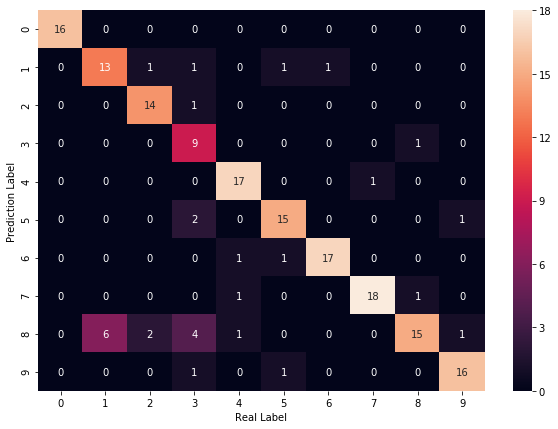

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9523809523809523

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9890414120106434

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1104 Total connections::1480
